In [1]:
!pip install requests


In [2]:
import requests

API_KEY = "e6b3bd8290427dc0c2fba8d99f1a34c1"

CITY = "Chennai"
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(URL)
data = response.json()

print(data)  # ← Add this to debug!

# Try loop only if 'list' exists
if "list" in data:
    for forecast in data["list"][:5]:
        time = forecast["dt_txt"]
        temp = forecast["main"]["temp"]
        print(f"At {time}, temperature will be {temp}°C")
else:
    print("Error: Weather data not received.")


{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1751392800, 'main': {'temp': 31.58, 'feels_like': 38.21, 'temp_min': 31.58, 'temp_max': 31.6, 'pressure': 1005, 'sea_level': 1005, 'grnd_level': 1005, 'humidity': 67, 'temp_kf': -0.02}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'clouds': {'all': 83}, 'wind': {'speed': 3.69, 'deg': 231, 'gust': 5.36}, 'visibility': 10000, 'pop': 0, 'sys': {'pod': 'n'}, 'dt_txt': '2025-07-01 18:00:00'}, {'dt': 1751403600, 'main': {'temp': 31.02, 'feels_like': 34.89, 'temp_min': 30.75, 'temp_max': 31.02, 'pressure': 1004, 'sea_level': 1004, 'grnd_level': 1003, 'humidity': 60, 'temp_kf': 0.27}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04n'}], 'clouds': {'all': 92}, 'wind': {'speed': 5.28, 'deg': 270, 'gust': 8.88}, 'visibility': 10000, 'pop': 0.08, 'sys': {'pod': 'n'}, 'dt_txt': '2025-07-01 21:00:00'}, {'dt': 1751414400, 'main': {'temp': 29.69, 'feels_like': 3

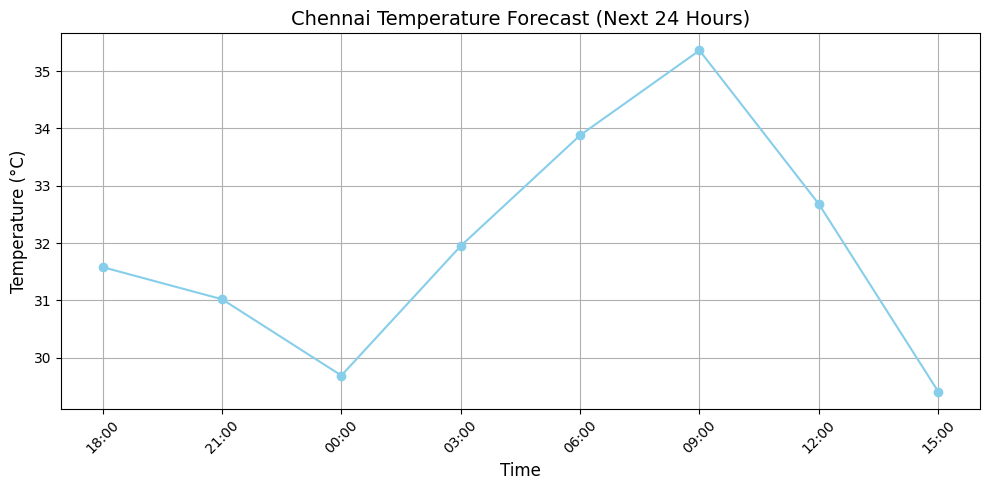

In [3]:
import matplotlib.pyplot as plt

# Extract time and temperature
times = []
temps = []

for forecast in data["list"][:8]:  # Get 8 data points (~24 hours)
    times.append(forecast["dt_txt"][11:16])  # Just HH:MM
    temps.append(forecast["main"]["temp"])

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(times, temps, marker='o', color='skyblue', linestyle='-')

plt.title("Chennai Temperature Forecast (Next 24 Hours)", fontsize=14)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Temperature (°C)", fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
for forecast in data["list"][:8]:
    time = forecast["dt_txt"][11:16]
    temp = forecast["main"]["temp"]
    weather = forecast["weather"][0]["description"]
    print(f"At {time} → {temp}°C → {weather}")


At 18:00 → 31.58°C → broken clouds
At 21:00 → 31.02°C → overcast clouds
At 00:00 → 29.69°C → overcast clouds
At 03:00 → 31.95°C → overcast clouds
At 06:00 → 33.88°C → overcast clouds
At 09:00 → 35.36°C → overcast clouds
At 12:00 → 32.68°C → light rain
At 15:00 → 29.41°C → light rain
